In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# With Given Features

In [33]:
features = pd.read_csv('features_processed.csv')
labels = pd.read_csv('labels_processed.csv')

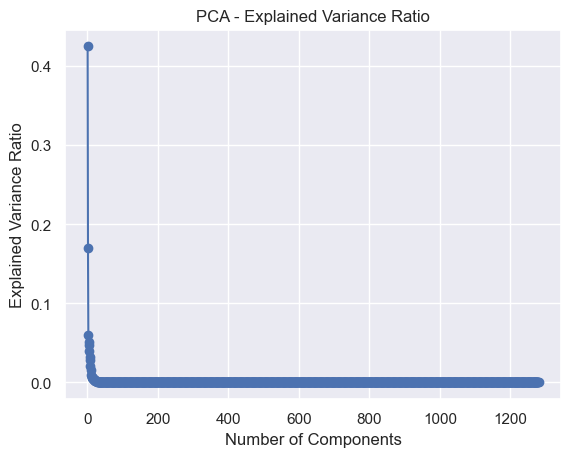

In [34]:
pca = PCA()
pca.fit(features)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.show()

In [35]:
pca = PCA(n_components=100)
pca.fit(features)
X = pca.transform(features)

# K Means

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


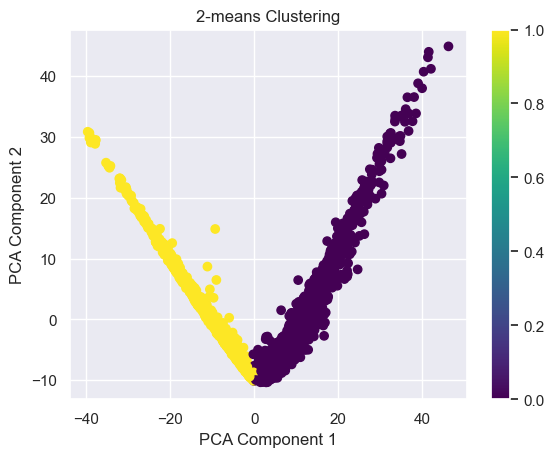

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


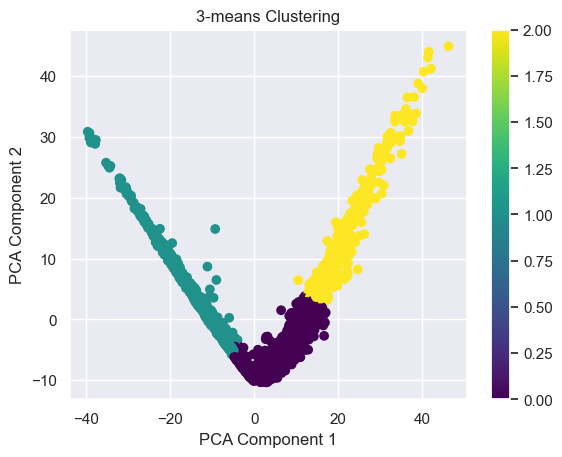

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


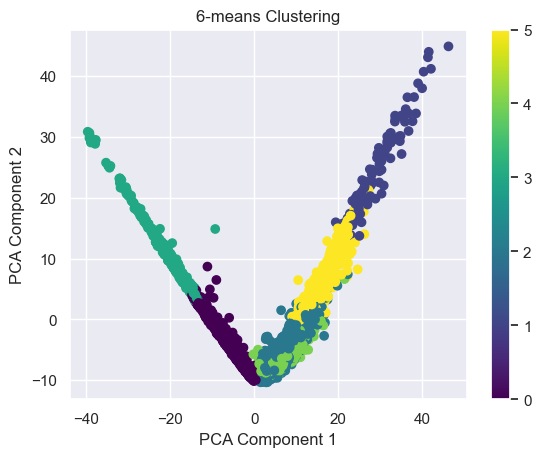

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


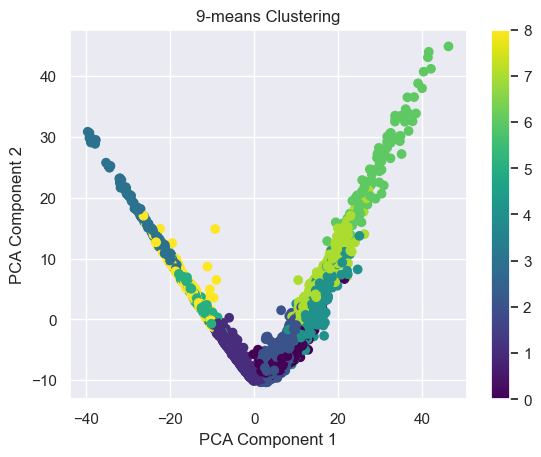

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


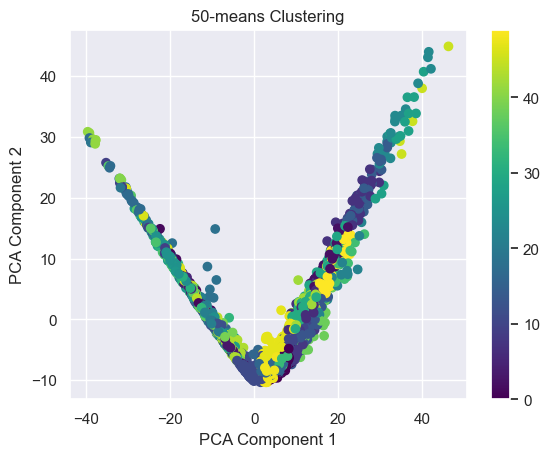

In [36]:
for k in [2,3,6,9,50]:    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(str(k) + '-means Clustering')
    plt.colorbar()
    plt.show()

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

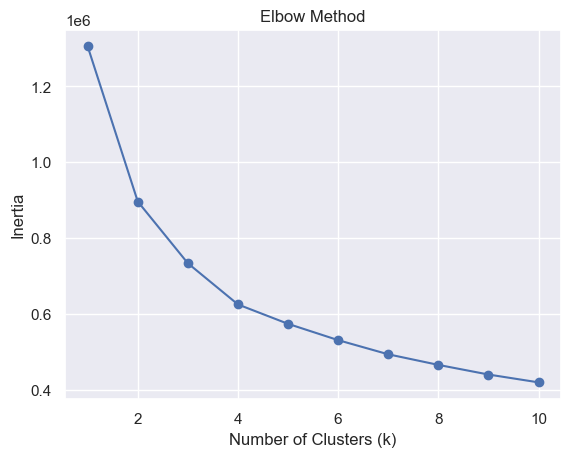

In [37]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [38]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


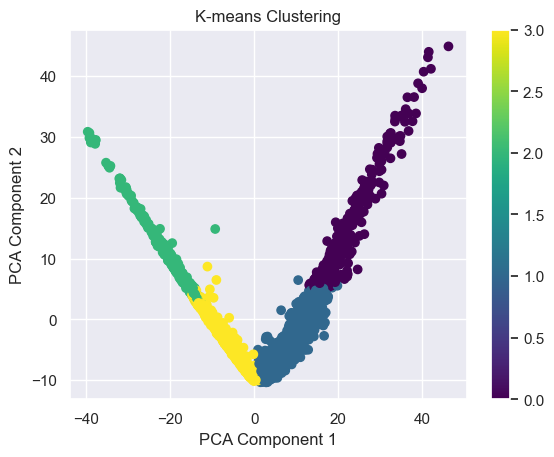

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

# EM

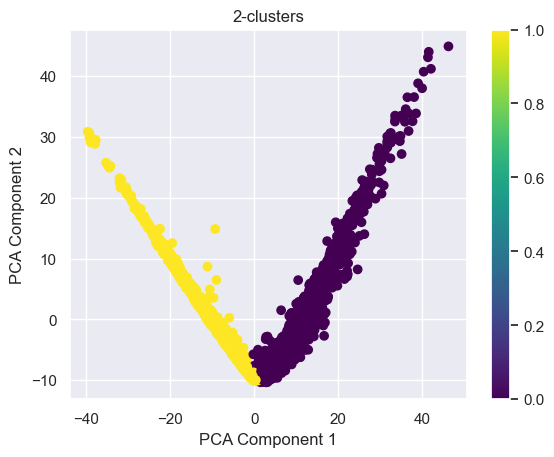

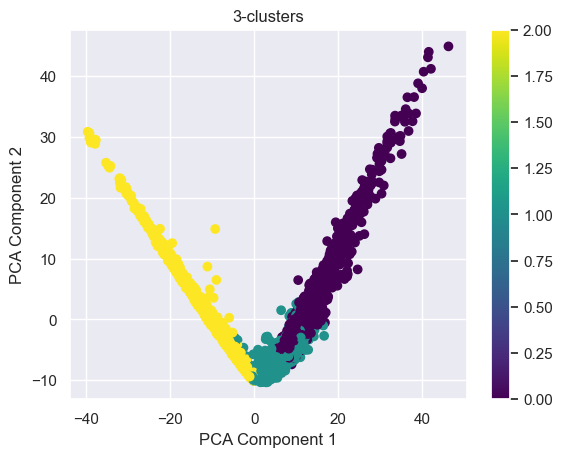

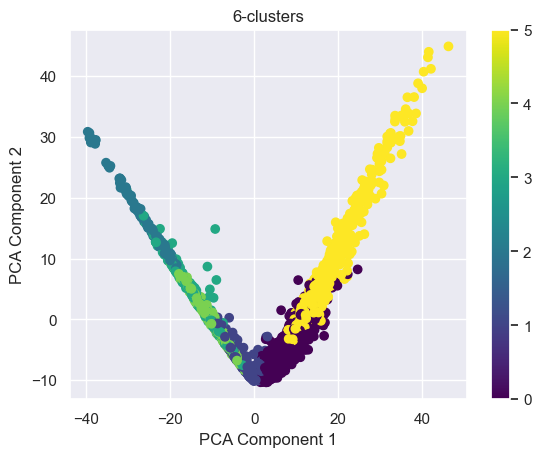

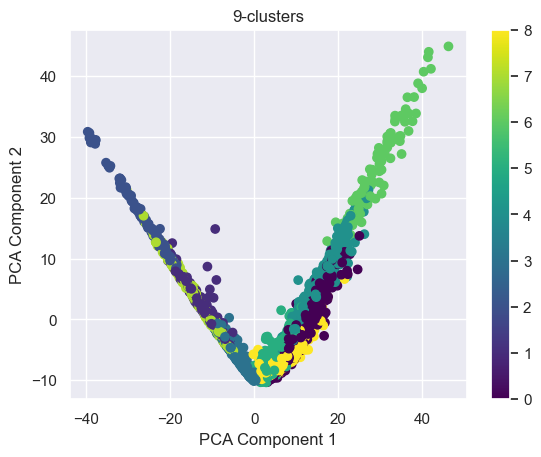

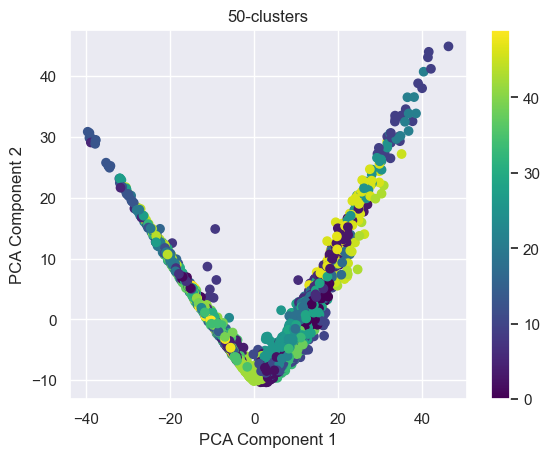

In [40]:
for k in [2,3,6,9,50]:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(str(k)+'-clusters')
    plt.colorbar()
    plt.show()

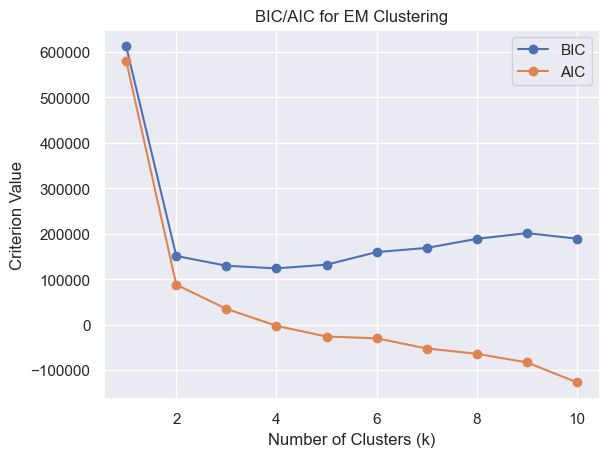

In [41]:
bic_values = []
aic_values = []
k_values = range(1, 11)

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    bic_values.append(gmm.bic(X))
    aic_values.append(gmm.aic(X))

plt.plot(k_values, bic_values, marker='o', label='BIC')
plt.plot(k_values, aic_values, marker='o', label='AIC')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Criterion Value')
plt.title('BIC/AIC for EM Clustering')
plt.legend()
plt.show()

In [42]:
best_k = 2
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm.fit(X)
cluster_labels = gmm.predict(X)

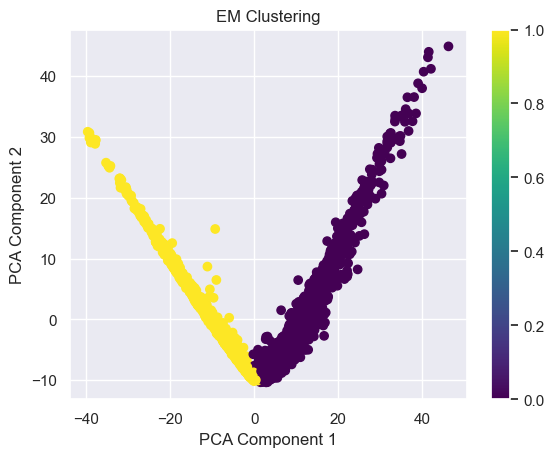

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('EM Clustering')
plt.colorbar()
plt.show()

# With Extracted Features

In [45]:
edge_features = pd.read_csv('data/clean_data/edge_cleaned.csv', index_col=0)
fourier_features = pd.read_csv('data/clean_data/fourier_cleaned.csv', index_col=0)
gabor_features = pd.read_csv('data/clean_data/gabor_cleaned.csv', index_col=0)
hist_features = pd.read_csv('data/clean_data/hist_cleaned.csv', index_col=0)
hog_features = pd.read_csv('data/clean_data/hog_cleaned.csv', index_col=0)
features = pd.concat([edge_features, fourier_features, gabor_features, hist_features, hog_features], axis=1).values
labels = pd.read_csv('data/clean_data/labels_cleaned.csv', index_col=0).values.squeeze()

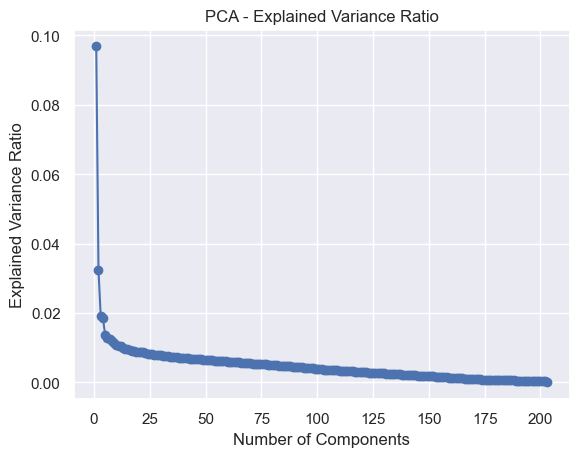

In [46]:
pca = PCA()
pca.fit(features)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.show()

In [47]:
pca = PCA(n_components=200)
pca.fit(features)
X = pca.transform(features)

# K Means

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


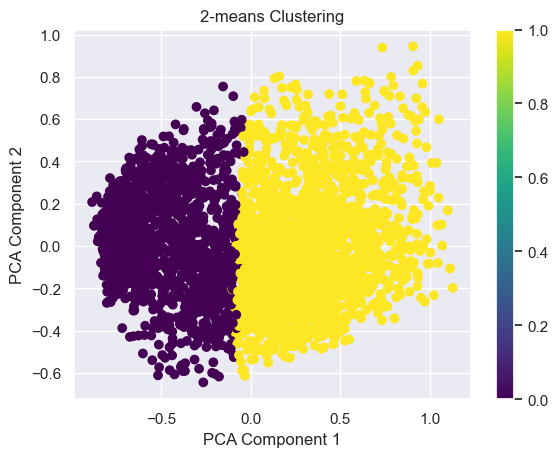

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


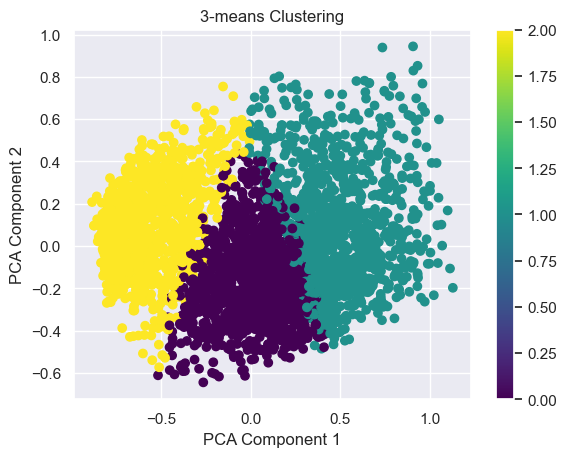

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


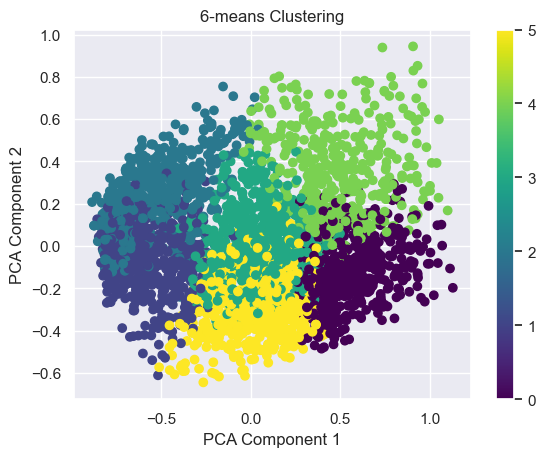

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


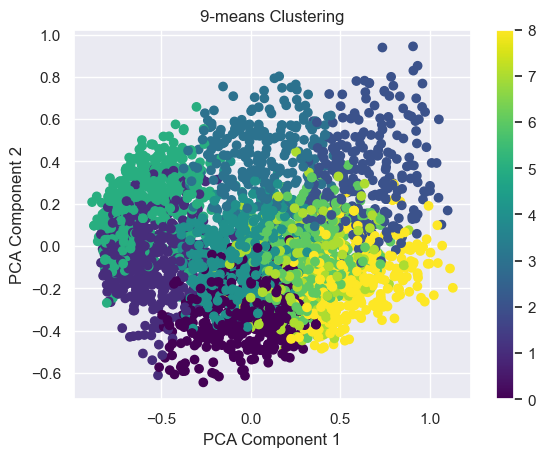

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


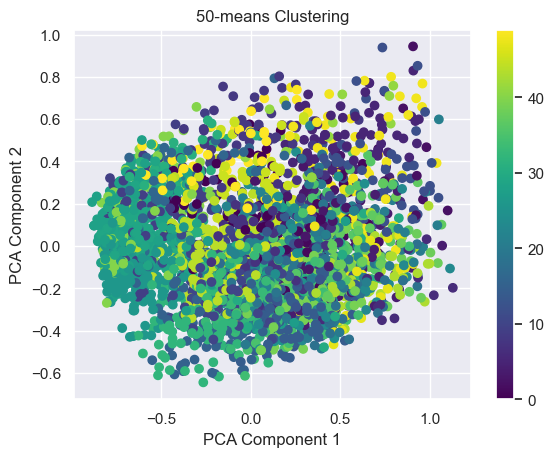

In [48]:
for k in [2,3,6,9,50]:    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(str(k) + '-means Clustering')
    plt.colorbar()
    plt.show()

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

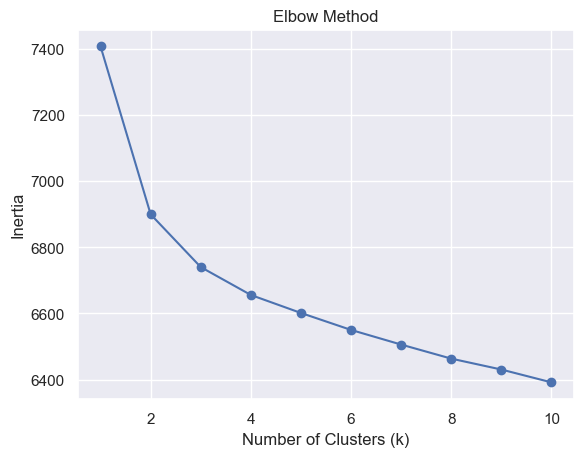

In [49]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [50]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


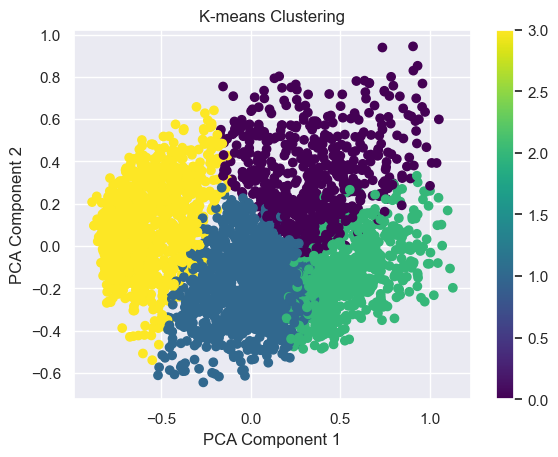

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

# EM

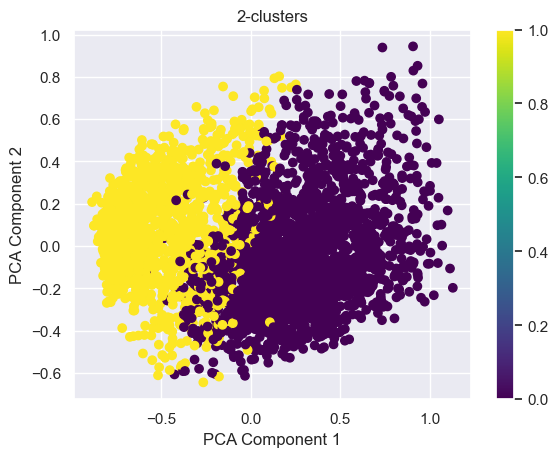

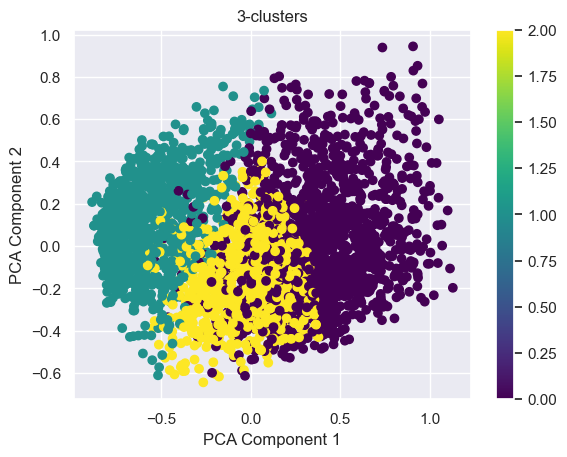

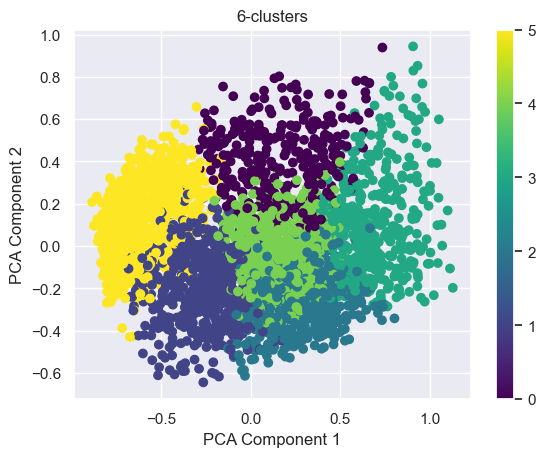

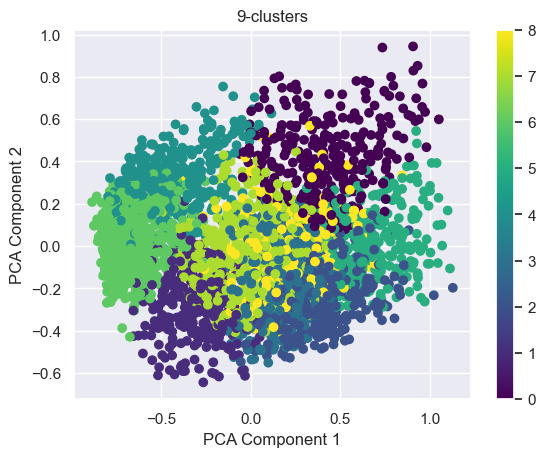

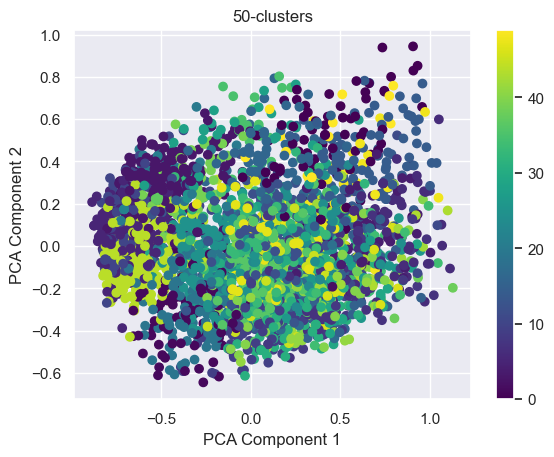

In [52]:
for k in [2,3,6,9,50]:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(str(k)+'-clusters')
    plt.colorbar()
    plt.show()

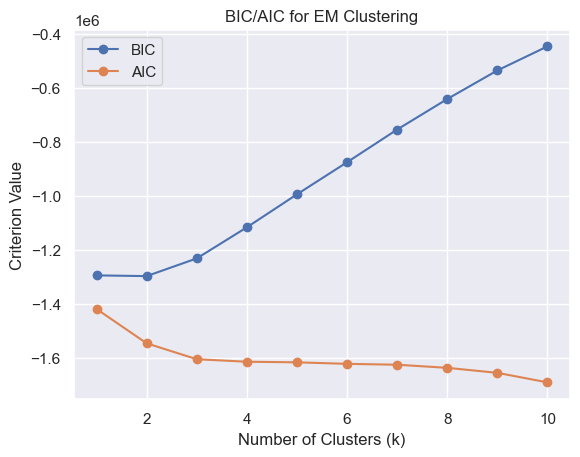

In [53]:
bic_values = []
aic_values = []
k_values = range(1, 11)

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    bic_values.append(gmm.bic(X))
    aic_values.append(gmm.aic(X))
X
plt.plot(k_values, bic_values, marker='o', label='BIC')
plt.plot(k_values, aic_values, marker='o', label='AIC')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Criterion Value')
plt.title('BIC/AIC for EM Clustering')
plt.legend()
plt.show()

In [54]:
best_k = 2
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm.fit(X)
cluster_labels = gmm.predict(X)

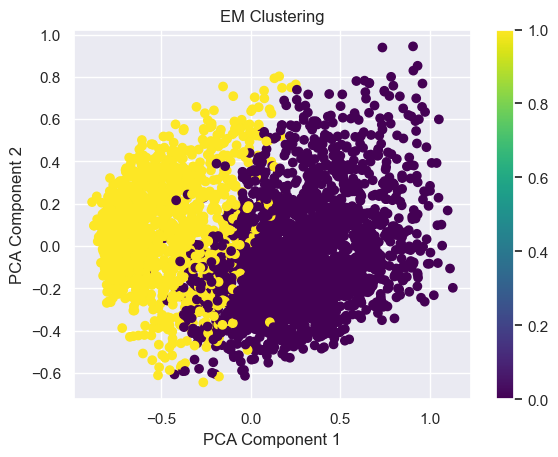

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('EM Clustering')
plt.colorbar()
plt.show()